In [2]:
print("1", end="|")
import matplotlib.pyplot as plt
print("2", end="|")
import xarray as xr
print("3", end="|")
import numpy as np
print("4", end="|")
import zarr
print("5", end="|")
import plotter as plo
print("6", end="|")
from cmcrameri import cm
print("7", end="|")
import pywtt
print("8", end="|")
import scipy.stats
print("9", end="|")
from matplotlib.gridspec import GridSpec
import matplotlib
matplotlib.rc('font', family='Helvetica Neue') 
matplotlib.rc('font', serif='Helvetica Neue') 
# matplotlib.rcParams.update({'font.size': 22})
print("10", end="|")
%matplotlib widget
print("11", end="|")


1|2|3|4|5|6|7|8|9|10|11|

## Plotting functions

## Implicit lakes

In [9]:
ds_imp = xr.open_zarr("./section_lake_implicit.zarr/")
ds_hck = xr.open_zarr("./section_lake_explicit_HACK.zarr/")
ds_exp = xr.open_zarr("./section_lake_explicit.zarr/")
ds_ev = xr.open_zarr("./section_lake_explicit_full_lake_find_ev_2.zarr/")
# ds_ev = ds_ev.sel({'batch':0})
ds_imp.x.values[0] = 0
ds_exp.x.values[0] = 0
ds_ev.x.values[0] = 0
ds_imp.y.values[0] = 0
ds_exp.y.values[0] = 0
ds_ev.y.values[0] = 0
ds_hck.x.values[0] = 0
ds_hck.y.values[0] = 0
ttim = 5e6

extents = [ds_imp.x.min(),ds_imp.x.max(),ds_imp.y.max(),ds_imp.y.min()]
shapa = ds_imp.ChonkBase__ny.values.item(0),ds_imp.ChonkBase__nx.values.item(0)


In [6]:
topomed_imp = np.median(ds_imp.sel({'otime': ttim}, method = "nearest").Topography__topography.values, axis = 1)
topomed_exp = np.median(ds_exp.sel({'otime': ttim}, method = "nearest").Topography__topography.values, axis = 1)
topomed_expev = np.median(ds_ev.sel({'batch': 6}).sel({'otime': ttim}, method = "nearest").Topography__topography.values, axis = 1)

topomin_imp = np.min(ds_imp.sel({'otime': ttim}, method = "nearest").Topography__topography.values, axis = 1)
topomin_exp = np.min(ds_exp.sel({'otime': ttim}, method = "nearest").Topography__topography.values, axis = 1)
topomin_expev = np.min(ds_ev.sel({'batch': 6}).sel({'otime': ttim}, method = "nearest").Topography__topography.values, axis = 1)


sedmed_imp = np.median(ds_imp.sel({'otime': ttim}, method = "nearest").Topography__sed_height.values, axis = 1)
sedmed_exp = np.median(ds_exp.sel({'otime': ttim}, method = "nearest").Topography__sed_height.values, axis = 1)
sedmed_expev = np.median(ds_ev.sel({'batch': 6}).sel({'otime': ttim}, method = "nearest").Topography__sed_height.values, axis = 1)
# input()
# print("1")
HS_imp = pywtt.minigraph(ds_imp.ChonkBase__nx.values.item(0), ds_imp.ChonkBase__ny.values.item(0), ds_imp.ChonkBase__nx.values.item(0) * ds_imp.ChonkBase__ny.values.item(0), ds_imp.ChonkBase__dx, ds_imp.ChonkBase__dy, 0, 0, ds_imp.Topography__topography.sel({"otime":ttim}).values.ravel()).get_HS()
# print("2")
HS_exp = pywtt.minigraph(ds_imp.ChonkBase__nx.values.item(0), ds_imp.ChonkBase__ny.values.item(0), ds_imp.ChonkBase__nx.values.item(0) * ds_imp.ChonkBase__ny.values.item(0), ds_imp.ChonkBase__dx, ds_imp.ChonkBase__dy, 0, 0, ds_exp.Topography__topography.sel({"otime":ttim}).values.ravel()).get_HS()
# print("3")
HS_ev = pywtt.minigraph(ds_imp.ChonkBase__nx.values.item(0), ds_imp.ChonkBase__ny.values.item(0), ds_imp.ChonkBase__nx.values.item(0) * ds_imp.ChonkBase__ny.values.item(0), ds_imp.ChonkBase__dx, ds_imp.ChonkBase__dy, 0, 0, ds_ev.Topography__topography.sel({"otime":ttim, 'batch':6}).values.ravel()).get_HS()

Ldepth_exp = ds_exp.Lake__lake_depth.sel({"otime":ttim}).values
Ldepth_ev = ds_ev.Lake__lake_depth.sel({"otime":ttim, 'batch':6}).values

Ldepth_exp[Ldepth_exp <=0] = np.nan
Ldepth_ev[Ldepth_ev <=0] = np.nan

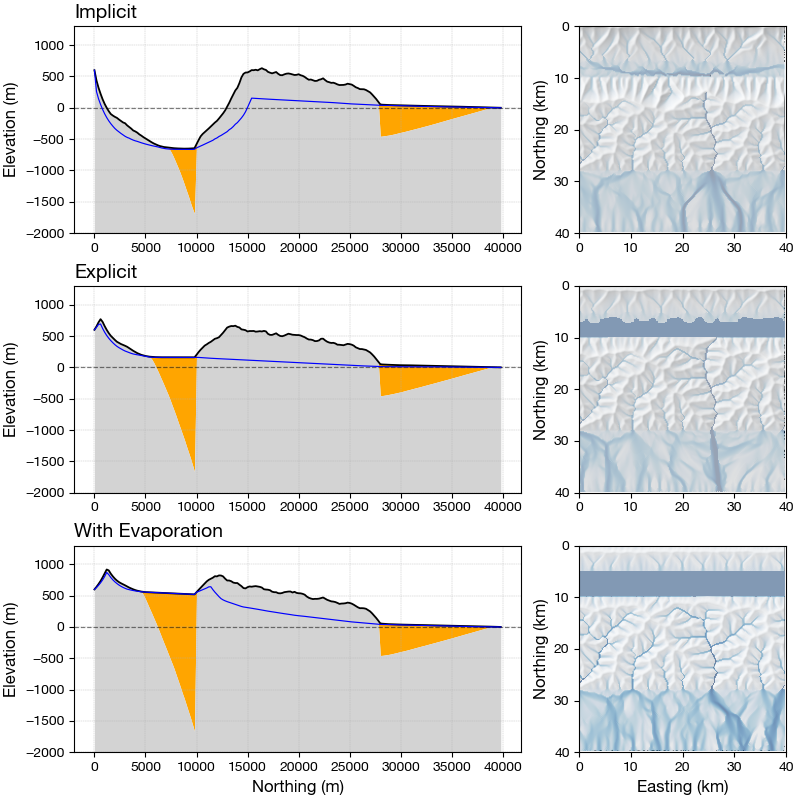

In [7]:
# tds = ds.sel({"otime":2e6})
fig = plt.figure(constrained_layout=True, figsize = (8,8))


gs = GridSpec( 3, 3, figure=fig)

ax1 = fig.add_subplot(gs[0,:2]); ax4 = fig.add_subplot(gs[0,2])
ax2 = fig.add_subplot(gs[1,:2]); ax5 = fig.add_subplot(gs[1,2])
ax3 = fig.add_subplot(gs[2,:2]); ax6 = fig.add_subplot(gs[2,2])


nbins = 50
cols = ["k", "#33ff58", "#3339ff"]


ax1.plot(ds_imp.y,topomed_imp, color = "k",  lw = 1.3, label = "Implicit")
ax2.plot(ds_imp.y,topomed_exp, color = "k", lw = 1.3, label = "Explicit")
ax3.plot(ds_imp.y,topomed_expev, color = "k", lw = 1.3, label = "With Ev.")
    
ax1.fill_between(ds_imp.y,topomed_imp - sedmed_imp,topomed_imp, color = "orange",  lw = 0)
ax2.fill_between(ds_imp.y,topomed_exp - sedmed_exp,topomed_exp, color = "orange", lw = 0)
ax3.fill_between(ds_imp.y,topomed_expev - sedmed_expev,topomed_expev, color = "orange",  lw = 0)

# ax1.fill_between(ds_imp.y,topomed_imp - sedmed_imp - 200, topomed_imp - sedmed_imp, color = "gray",  lw = 0)
# ax2.fill_between(ds_imp.y,topomed_exp - sedmed_exp - 200, topomed_exp - sedmed_exp, color = "gray", lw = 0)
# ax3.fill_between(ds_imp.y,topomed_expev - sedmed_expev - 200, topomed_expev - sedmed_expev, color = "gray",  lw = 0)

ax1.fill_between(ds_imp.y,-2000, topomed_imp - sedmed_imp, color = "lightgray",  lw = 0)
ax2.fill_between(ds_imp.y,-2000, topomed_exp - sedmed_exp, color = "lightgray", lw = 0)
ax3.fill_between(ds_imp.y,-2000, topomed_expev - sedmed_expev, color = "lightgray",  lw = 0)

ax1.axhline(0, color = 'k', ls = '--', lw = 0.86, alpha = 0.5)
ax2.axhline(0, color = 'k', ls = '--', lw = 0.86, alpha = 0.5)
ax3.axhline(0, color = 'k', ls = '--', lw = 0.86, alpha = 0.5)

ax1.plot(ds_imp.y,topomin_imp, color = "blue",  lw = 0.85)#, ls = '--')
ax2.plot(ds_imp.y,topomin_exp, color = "blue",  lw = 0.85)#, ls = '--')
ax3.plot(ds_imp.y,topomin_expev, color = "blue",  lw = 0.85)#, ls = '--')

ax1.set_ylabel("Elevation (m)",font = {'weight':'normal', 'family':'Helvetica Neue', 'size':12})
ax2.set_ylabel("Elevation (m)",font = {'weight':'normal', 'family':'Helvetica Neue', 'size':12})
ax3.set_ylabel("Elevation (m)",font = {'weight':'normal', 'family':'Helvetica Neue', 'size':12})
ax3.set_xlabel("Northing (m)",font = {'weight':'normal', 'family':'Helvetica Neue', 'size':12})

ax1.grid(ls='--', alpha = 0.9, lw = 0.3, zorder = 0.9)
ax2.grid(ls='--', alpha = 0.9, lw = 0.3, zorder = 0.9)
ax3.grid(ls='--', alpha = 0.9, lw = 0.3, zorder = 0.9)

ax1.set_ylim(-2000,1300)
ax2.set_ylim(-2000,1300)
ax3.set_ylim(-2000,1300)

ax1.set_title("Implicit", loc='left', font = {'weight':'bold', 'family':'Helvetica Neue', 'size':14})
ax2.set_title("Explicit", loc='left', font = {'weight':'bold', 'family':'Helvetica Neue', 'size':14})
ax3.set_title("With Evaporation", loc='left', font = {'weight':'bold', 'family':'Helvetica Neue', 'size':14})


from matplotlib.colors import LinearSegmentedColormap
color_ramp = LinearSegmentedColormap.from_list( 'yolo', [ '#8299b4','#8299b4'] )


ax4.imshow(HS_imp.reshape(shapa), extent = extents, cmap = "gray",zorder = 1)
ax4.imshow(np.log10(ds_imp.Flow__Qw.sel({"otime":ttim}).values), extent = extents, cmap = "Blues",zorder = 1, alpha = 0.3, vmin = 5, vmax = 8)
# ax4.contour(ds_imp.Topography__topography.sel({"otime":ttim}).values[::-1], zorder = 2,cmap = "magma",extent = extents, levels = 4, vmin = 0, vmax = 1000, alpha = 0.5)


ax5.imshow(HS_exp.reshape(shapa), extent = extents, cmap = "gray",zorder = 1)
ax5.imshow(np.log10(ds_exp.Flow__Qw.sel({"otime":ttim}).values), extent = extents, cmap = "Blues",zorder = 1, alpha = 0.3, vmin = 5, vmax = 8)
# ax5.contour(ds_exp.Topography__topography.sel({"otime":ttim}).values[::-1], zorder = 2,cmap = "magma",extent = extents, levels = 4, vmin = 100, vmax = 1000, alpha = 0.5)
ax5.imshow(Ldepth_exp, extent=extents, cmap = color_ramp, vmin = 9999, vmax = 99999, zorder  =2)

ax6.imshow(HS_ev.reshape(shapa), extent = extents, cmap = "gray",zorder = 1)
ax6.imshow(np.log10(ds_ev.Flow__Qw.sel({"otime":ttim, 'batch':6}).values), extent = extents, cmap = "Blues",zorder = 1, alpha = 0.5, vmin = 5, vmax = 8)
ax6.imshow(Ldepth_ev, extent=extents, cmap = color_ramp, vmin = 9999, vmax = 99999, zorder = 2)
# ax6.contour(ds_ev.Topography__topography.sel({"otime":ttim, 'batch':6}).values[::-1], zorder = 2,cmap = "magma",extent = extents, levels = 4, vmin = 100, vmax = 1000, alpha = 0.5)

ax4.set_xticks([0,1e4,2e4,3e4,4e4])
ax4.set_xticklabels([0,10,20,30,40])
ax4.set_yticks([0,1e4,2e4,3e4,4e4])
ax4.set_yticklabels([0,10,20,30,40])
ax5.set_xticks([0,1e4,2e4,3e4,4e4])
ax5.set_xticklabels([0,10,20,30,40])
ax5.set_yticks([0,1e4,2e4,3e4,4e4])
ax5.set_yticklabels([0,10,20,30,40])
ax6.set_xticks([0,1e4,2e4,3e4,4e4])
ax6.set_xticklabels([0,10,20,30,40])
ax6.set_yticks([0,1e4,2e4,3e4,4e4])
ax6.set_yticklabels([0,10,20,30,40])

ax6.set_xlabel("Easting (km)",font = {'weight':'normal', 'family':'Helvetica Neue', 'size':12})
ax6.set_ylabel("Northing (km)",font = {'weight':'normal', 'family':'Helvetica Neue', 'size':12})
ax4.set_ylabel("Northing (km)",font = {'weight':'normal', 'family':'Helvetica Neue', 'size':12})
ax5.set_ylabel("Northing (km)",font = {'weight':'normal', 'family':'Helvetica Neue', 'size':12})

plt.savefig("/Users/gailleto/Desktop/papers/CHONK_!/figure_lake_python.svg")

In [16]:
Ldepth_exp
np.unique(Ldepth_exp)


array([0.06055335, 0.06055367, 0.06055392, ..., 0.57735472, 0.57835563,
              nan])

In [11]:
sumqs = {}
sumqs['imp'] = []
sumqs['exp'] = []
sumqs['ev'] = []
sumqs['hck'] = []
sumsh = {}
sumsh['imp'] = []
sumsh['exp'] = []
sumsh['ev'] = []
sumsh['hck'] = []

for i in range(ds_imp.otime.values.shape[0]):
    sumqs['imp'].append(ds_imp.isel({'otime':i}).ChonkBase__Q_sout_lab_S.values.sum())
    sumqs['exp'].append(ds_exp.isel({'otime':i}).ChonkBase__Q_sout_lab_S.values.sum())
    sumqs['ev'].append(ds_ev.isel({'otime':i, 'batch' : 6}).ChonkBase__Q_sout_lab_S.values.sum())
    sumqs['hck'].append(ds_hck.isel({'otime':i}).ChonkBase__Q_sout_lab_S.values.sum())
    sumsh['imp'].append(ds_imp.isel({'otime':i}).Topography__sed_height.values.sum())
    sumsh['exp'].append(ds_exp.isel({'otime':i}).Topography__sed_height.values.sum())
    sumsh['hck'].append(ds_hck.isel({'otime':i}).Topography__sed_height.values.sum())
    sumsh['ev'].append(ds_ev.isel({'otime':i, 'batch' : 6}).Topography__sed_height.values.sum())

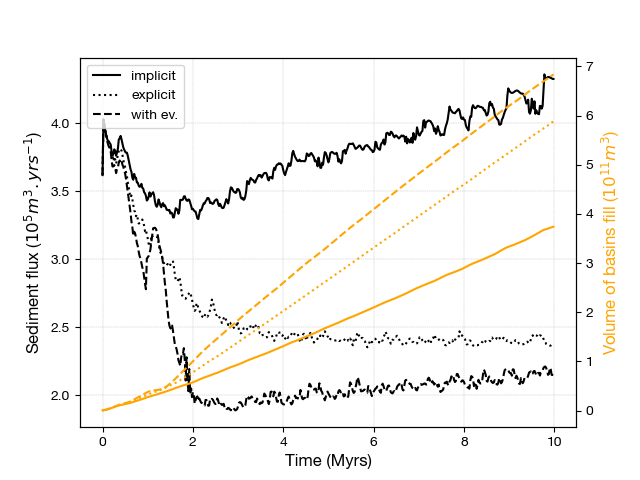

In [13]:
fig, ax = plt.subplots()



ax.plot(ds_imp.otime/1e6, np.array(sumqs['imp'])/1e5, ls = "-", c = 'k', label = 'implicit')
ax.plot(ds_imp.otime/1e6, np.array(sumqs['exp'])/1e5, ls = "dotted", c = 'k', label = 'explicit')
ax.plot(ds_imp.otime/1e6, np.array(sumqs['ev'])/1e5, ls = "--", c = 'k', label = 'with ev.')

ax.set_xlabel("Time (Myrs)", font = {"family":"Helvetica Neue", "size":12})
ax.set_ylabel("Sediment flux ($10^5m^3.yrs^{-1}$)", font = {"family":"Helvetica Neue", "size":12})


ax2 = ax.twinx()
ax2.plot(ds_imp.otime/1e6, np.array(sumsh['imp']) * ds_imp.ChonkBase__dx.values * ds_imp.ChonkBase__dy.values / 1e11, ls = "-", c = 'orange')
ax2.plot(ds_imp.otime/1e6, np.array(sumsh['exp']) * ds_imp.ChonkBase__dx.values * ds_imp.ChonkBase__dy.values / 1e11, ls = "dotted", c = 'orange')
ax2.plot(ds_imp.otime/1e6, np.array(sumsh['ev']) * ds_imp.ChonkBase__dx .values* ds_imp.ChonkBase__dy.values / 1e11, ls = "--", c = 'orange')

ax2.set_ylabel("Volume of basins fill ($10^{11}m^3$)", font = {"family":"Helvetica Neue", "size":12}, color = "orange")


ax.legend(loc="upper left")

ax.grid(ls='--', alpha = 0.9, lw = 0.3, zorder = 0.9)

# plt.savefig("/Users/gailleto/Desktop/papers/CHONK_!/figure_lake_Qs_python.svg")
# plt.savefig("/Users/gailleto/Desktop/papers/CHONK_!/figure_lake_Qs_python.pdf")
# ax.set_yscale('log')


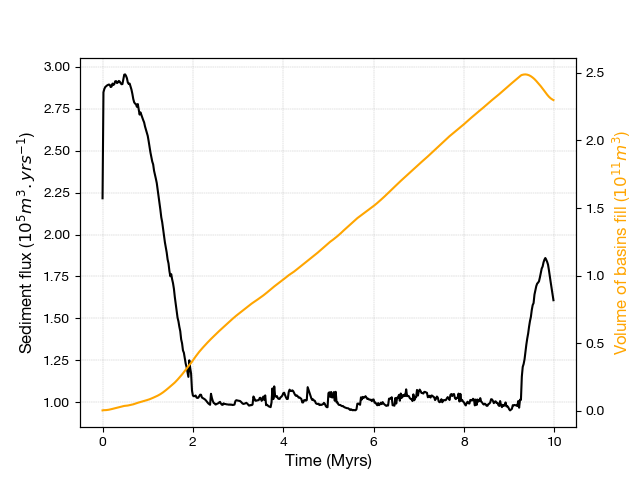

In [14]:
fig, ax = plt.subplots()



ax.plot(ds_imp.otime/1e6, np.array(sumqs['hck'])/1e5, ls = "-", c = 'k', label = 'implicit')

ax.set_xlabel("Time (Myrs)", font = {"family":"Helvetica Neue", "size":12})
ax.set_ylabel("Sediment flux ($10^5m^3.yrs^{-1}$)", font = {"family":"Helvetica Neue", "size":12})


ax2 = ax.twinx()
ax2.plot(ds_imp.otime/1e6, np.array(sumsh['hck']) * ds_hck.ChonkBase__dx.values * ds_hck.ChonkBase__dy.values / 1e11, ls = "-", c = 'orange')

ax2.set_ylabel("Volume of basins fill ($10^{11}m^3$)", font = {"family":"Helvetica Neue", "size":12}, color = "orange")


# ax.legend(loc="upper left")
# plt.savefig("/Users/gailleto/Desktop/papers/CHONK_!/figure_lake_Qs_python.svg")

ax.grid(ls='--', alpha = 0.9, lw = 0.3, zorder = 0.9)

plt.savefig("/Users/gailleto/Desktop/papers/CHONK_!/figure_lake_Qshacky_python.svg")


In [38]:
print('implicit:', ds_imp.Precipitation__precipitation_rate.values)
print('explicit:', ds_exp.Precipitation__precipitation_rate.values)
print('with ev:', ds_ev.Precipitation__precipitation_rate.values)


implicit: 0.7
explicit: 0.7
with ev: [0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75]


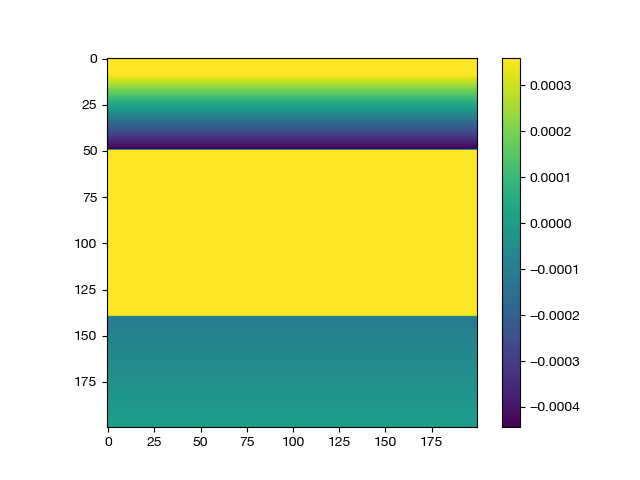

In [37]:
fig,ax = plt.subplots();cb = ax.imshow(ds_imp.Uplift__intensity * ds_imp.Uplift__pattern);plt.colorbar(cb)


In [10]:
plo.waterNtopo_profile(
	ds, # The input ds 
	fname = "watpro_explicit_ev",
	timedim = "otime", # the time dimension
	batch_dim = None, # if there is a batch dim to pick
	batch_val = None, # if there is a batch dim to pick
	z_min = None, # minimum z on the cross_section, if left to none -> min of all
	z_max = None, # max z on the cross_section, if left to none -> min of all
	czmin = 3,
	czmax = 9,
	# Map parameters
	cmap_wat = 'Blues', # cmap of the cross-section
	alpha_hillshade = 0.4, # transparency of the hillshade
	figsize = (8,3),
	custom_tickszz = None,
	invert_ticks = True
)

  0%|          | 0/500 [00:00<?, ?it/s]

Movie created at watpro_explicit_ev.mp4
GIF created at watpro_explicit_ev.gif


In [10]:
from ipyfastscape import TopoViz3d


app = TopoViz3d(ds_hck, canvas_height=600, time_dim="otime", elevation_var = "Topography__topography" )

app.show()

Output(layout=Layout(height='640px'))

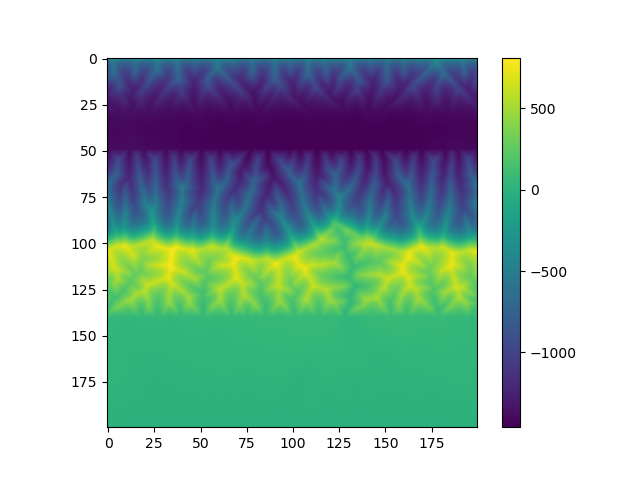

In [5]:
fig, ax = plt.subplots()
cb = ax.imshow(ds_imp.Topography__topography.values[-1])
plt.colorbar(cb)

In [ ]:
fig, ax = plt.subplots()
ax.plot(ds.y.values,ds.Uplift__pattern.values[:, 0], color = "k", ls = "--", lw = 2)


In [ ]:
plo.anim_lake_cross_section(
	ds, # The input ds 
	fname = "explicit_ev",
	timedim = "otime", # the time dimension
	batch_dim = 'batch', # if there is a batch dim to pick
	batch_val = 5, # if there is a batch dim to pick
	cross_section_dir = 'x', # is the cross section in x or y direction
	xy_cross_section = 1000, # coordinate on the other axis
	color_bedrock = 'gray', # color of the bedrock
	color_sediments = 'orange', # color of the bedrock
	color_water = 'blue', # color of the water
	z_min = None, # minimum z on the cross_section, if left to none -> min of all
	z_max = None, # max z on the cross_section, if left to none -> min of all
	czmin = 0,
	czmax = 1800,
	# Map parameters
	cmap_elev = 'gist_earth', # cmap of the cross-section
	alpha_hillshade = 0.6, # transparency of the hillshade
	figsize = (8,3),
	custom_tickszz = None,
	invert_ticks = True
)

In [ ]:
ds.Uplift__intensity.sel({"batch":-1}).values


In [1]:
import pywtt

In [2]:
help(pywtt)

Help on module pywtt:

NAME
    pywtt

DESCRIPTION
    pywtt example plugin
    -----------------------
    .. currentmodule:: pywtt
    .. autosummary::
       :toctree: _generate

CLASSES
    pybind11_builtins.pybind11_object(builtins.object)
        minigraph
    
    class minigraph(pybind11_builtins.pybind11_object)
     |  Method resolution order:
     |      minigraph
     |      pybind11_builtins.pybind11_object
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  __init__(...)
     |      __init__(self: pywtt.minigraph, arg0: int, arg1: int, arg2: int, arg3: float, arg4: float, arg5: float, arg6: float, arg7: numpy.ndarray[numpy.float32]) -> None
     |  
     |  ----------------------------------------------------------------------
     |  Static methods inherited from pybind11_builtins.pybind11_object:
     |  
     |  __new__(*args, **kwargs) from pybind11_builtins.pybind11_type
     |      Create and return a new object.  See help(type) for a

Text(0.5, 1.0, 'With Evaporation')

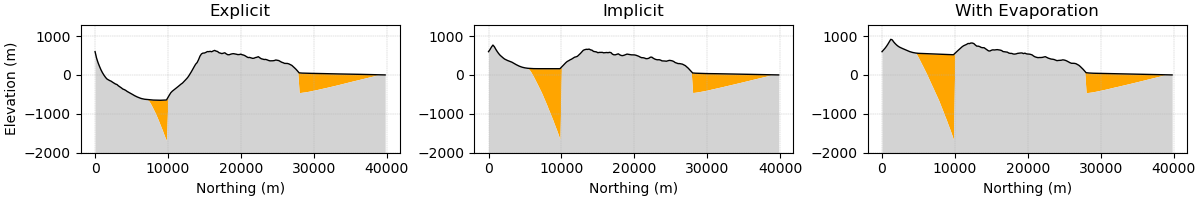

In [9]:
# tds = ds.sel({"otime":2e6}) 
fig = plt.figure(constrained_layout=True, figsize = (12,2))


gs = GridSpec(1, 3, figure=fig)

ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[:,1])
ax3 = fig.add_subplot(gs[:,2])

nbins = 50
cols = ["k", "#33ff58", "#3339ff"]


ax1.plot(ds_imp.y,topomed_imp, color = "k",  lw = 1, label = "Implicit")
ax2.plot(ds_imp.y,topomed_exp, color = "k", lw = 1, label = "Explicit")
ax3.plot(ds_imp.y,topomed_expev, color = "k",  lw = 1, label = "With Ev.")
    
ax1.fill_between(ds_imp.y,topomed_imp - sedmed_imp,topomed_imp, color = "orange",  lw = 0)
ax2.fill_between(ds_imp.y,topomed_exp - sedmed_exp,topomed_exp, color = "orange", lw = 0)
ax3.fill_between(ds_imp.y,topomed_expev - sedmed_expev,topomed_expev, color = "orange",  lw = 0)

# ax1.fill_between(ds_imp.y,topomed_imp - sedmed_imp - 200, topomed_imp - sedmed_imp, color = "gray",  lw = 0)
# ax2.fill_between(ds_imp.y,topomed_exp - sedmed_exp - 200, topomed_exp - sedmed_exp, color = "gray", lw = 0)
# ax3.fill_between(ds_imp.y,topomed_expev - sedmed_expev - 200, topomed_expev - sedmed_expev, color = "gray",  lw = 0)

ax1.fill_between(ds_imp.y,-2000, topomed_imp - sedmed_imp, color = "lightgray",  lw = 0)
ax2.fill_between(ds_imp.y,-2000, topomed_exp - sedmed_exp, color = "lightgray", lw = 0)
ax3.fill_between(ds_imp.y,-2000, topomed_expev - sedmed_expev, color = "lightgray",  lw = 0)

# ax2.plot(ds_imp.y,sedmed_imp, color = "orange",  lw = 0.85)
# ax2.plot(ds_imp.y,sedmed_exp, color = "orange",  lw = 0.85)
# ax2.plot(ds_imp.y,sedmed_expev, color = "orange",  lw = 0.85)

ax1.set_xlabel("Northing (m)")
ax2.set_xlabel("Northing (m)")
ax3.set_xlabel("Northing (m)")
ax1.set_ylabel("Elevation (m)")

ax1.grid(ls='--', alpha = 0.9, lw = 0.3, zorder = 0.9)
ax2.grid(ls='--', alpha = 0.9, lw = 0.3, zorder = 0.9)
ax3.grid(ls='--', alpha = 0.9, lw = 0.3, zorder = 0.9)

ax1.set_ylim(-2000,1300)
ax2.set_ylim(-2000,1300)
ax3.set_ylim(-2000,1300)

ax1.set_title("Explicit")
ax2.set_title("Implicit")
ax3.set_title("With Evaporation")

# ax1.legend()
# ax2.invert_yaxis()

In [6]:



# tds = ds.sel({"otime":2e6})
# fig = plt.figure(constrained_layout=True)


# gs = GridSpec(100, 100, figure=fig)

# ax1 = fig.add_subplot(gs[40:,:])
# ax2 = fig.add_subplot(gs[:40,:])

# nbins = 50
# cols = ["k", "#33ff58", "#3339ff"]


# ax1.plot(tds.y,topomin_imp, color = "b", ls = "--", lw = 1)
# ax1.plot(tds.y,topomin_exp, color = "b",ls = "-.", lw = 1)
# ax1.plot(tds.y,topomin_expev, color = "b", ls = "-", lw = 1)
    
# ax1.plot(tds.y,topomed_imp, color = "k", ls = "--", lw = 1.5, label = "Implicit")
# ax1.plot(tds.y,topomed_exp, color = "k",ls = "-.", lw = 1.5, label = "Explicit")
# ax1.plot(tds.y,topomed_expev, color = "k", ls = "-", lw = 1.5, label = "With Ev.")

# ax2.plot(tds.y,sedmed_imp, color = "orange", ls = "--", lw = 0.85)
# ax2.plot(tds.y,sedmed_exp, color = "orange", ls = "-.", lw = 0.85)
# ax2.plot(tds.y,sedmed_expev, color = "orange", ls = "-", lw = 0.85)

# ax1.set_xlabel("Northing (m)")
# ax1.set_ylabel("Elevation (m)")
# ax2.set_ylabel("Sediment cover (m)")
# ax2.set_xticklabels([])
# ax1.grid(ls='--', alpha = 0.9, lw = 0.3, zorder = 0.9)
# ax2.grid(ls='--', alpha = 0.9, lw = 0.3, zorder = 0.9)

# ax1.legend()
# ax2.invert_yaxis()
# ax.imshow(tds.Topography__topography, extent = [tds.x.min(),tds.x.max(),tds.y.max(),ds.y.min()], cmap = cm.grayC_r)
# riv = np.log10(tds.Flow__Qw.values)
# # riv[riv<6] = np.nan
# ax.imshow(riv, extent = [tds.x.min(),tds.x.max(),tds.y.max(),ds.y.min()], cmap = "Blues", vmin =3, vmax = 9, alpha = 0.6 )

